# Player Analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Cleaning and Exploration

In [3]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

matches= pd.merge(df1, df2, on='match_id', how='outer')

In [4]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [5]:
matches = matches[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman','non_striker', 'bowler','wide_runs','bye_runs', 'legbye_runs','noball_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

matches.shape

(179078, 24)

In [6]:
matches.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,4,0,4,NaN,NaN
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,0,0,0,0,0,0,0,NaN,NaN
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,TS Mills,2,0,0,0,0,2,2,NaN,NaN


## Taking in Consideration only MI VS RR matches

In [7]:
MI_RR =matches[np.logical_or(np.logical_and(matches['team1']=='Mumbai Indians',matches['team2']=='Rajasthan Royals'),
                            np.logical_and(matches['team2']=='Mumbai Indians',matches['team1']=='Rajasthan Royals'))]

In [8]:
MI_RR.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
20024,86,2008,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Rajasthan Royals,Mumbai Indians,...,SM Pollock,0,0,0,0,0,0,0,NaN,NaN
20025,86,2008,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Rajasthan Royals,Mumbai Indians,...,SM Pollock,0,0,0,0,1,0,1,NaN,NaN
20026,86,2008,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Rajasthan Royals,Mumbai Indians,...,SM Pollock,0,0,0,0,1,0,1,NaN,NaN
20027,86,2008,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Rajasthan Royals,Mumbai Indians,...,SM Pollock,0,0,0,0,0,0,0,NaN,NaN
20028,86,2008,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Rajasthan Royals,Mumbai Indians,...,SM Pollock,0,0,0,0,1,0,1,NaN,NaN


In [9]:
MI_RR.match_id.nunique()

20

In [10]:
MI_RR.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2018, 2019],
      dtype=int64)

## BIS Calculation

### Q de Kock

- Total runs scored by the batsman

In [11]:
qdk = MI_RR[(MI_RR["batting_team"] == "Mumbai Indians")&(MI_RR["batsman"]=="Q de Kock")]
qdk.iloc[:,4:].head()

,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
171070,Rajasthan Royals,field,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,1,2,Q de Kock,RG Sharma,K Gowtham,0,0,0,0,1,0,1,NaN,NaN
171074,Rajasthan Royals,field,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,1,6,Q de Kock,RG Sharma,K Gowtham,0,0,0,0,0,0,0,NaN,NaN
171077,Rajasthan Royals,field,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,2,3,Q de Kock,RG Sharma,DS Kulkarni,0,0,0,0,0,0,0,NaN,NaN
171078,Rajasthan Royals,field,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,2,4,Q de Kock,RG Sharma,DS Kulkarni,0,0,0,0,1,0,1,NaN,NaN
171080,Rajasthan Royals,field,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,2,6,Q de Kock,RG Sharma,DS Kulkarni,0,0,0,0,1,0,1,NaN,NaN


In [12]:
qdk_runs= qdk[qdk["wide_runs"]==0]

In [13]:
batsman_runs11 = qdk_runs.groupby(["match_id"]).agg({"batsman_runs":"sum","ball":"count"})
batsman_runs11

,batsman_runs,ball
match_id,,
11318,82,52
11327,66,48


- Runs by boundaries

In [14]:
qdk_runs.batsman_runs.unique()

array([1, 0, 6, 2, 4], dtype=int64)

In [15]:
qdk_boundaries = qdk_runs[(qdk_runs["batsman_runs"]==4)|(qdk_runs["batsman_runs"]==6)]

boundary_runs11 = pd.DataFrame(qdk_boundaries.groupby(["match_id"])["batsman_runs"].sum())

boundary_runs11.columns = ["boundary runs"]

boundary_runs11

,boundary runs
match_id,
11318,48
11327,36


- Runs by 1,2 and 3

In [16]:
qdk_running = qdk_runs[(qdk_runs["batsman_runs"]==1)|(qdk_runs["batsman_runs"]==2)|(qdk_runs["batsman_runs"]==3)]

batsman_running11 = pd.DataFrame(qdk_running.groupby(["match_id"])["batsman_runs"].sum())

batsman_running11.columns = ["running runs"]

batsman_running11

,running runs
match_id,
11318,34
11327,30


In [17]:
final11 = pd.merge(batsman_runs11, boundary_runs11, on='match_id', how='inner')

final11

,batsman_runs,ball,boundary runs
match_id,,,
11318,82,52,48
11327,66,48,36


In [18]:
final11 = pd.merge(final11, batsman_running11, on='match_id', how='inner')

final11

,batsman_runs,ball,boundary runs,running runs
match_id,,,,
11318,82,52,48,34
11327,66,48,36,30


In [19]:
BIS_QDK =((final11["batsman_runs"] + final11["boundary runs"]) - (final11["running runs"]) * 0.5) / final11["ball"]
BIS_QDK = sum(BIS_QDK)/len(BIS_QDK)

In [20]:
print("BIS for QDK :" , round(BIS_QDK,2))

BIS for QDK : 1.99


### Sanju Samson

- Toal runs scored by batsman

In [21]:
samson = MI_RR[(MI_RR["batting_team"] == "Rajasthan Royals")&(MI_RR["batsman"]=="SV Samson")]
samson.iloc[:,4:].head()

,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
106024,Rajasthan Royals,field,Mumbai Indians,2,Rajasthan Royals,Mumbai Indians,5,1,SV Samson,AM Rahane,MG Johnson,0,0,0,0,4,0,4,NaN,NaN
106025,Rajasthan Royals,field,Mumbai Indians,2,Rajasthan Royals,Mumbai Indians,5,2,SV Samson,AM Rahane,MG Johnson,0,0,0,0,0,0,0,NaN,NaN
106026,Rajasthan Royals,field,Mumbai Indians,2,Rajasthan Royals,Mumbai Indians,5,3,SV Samson,AM Rahane,MG Johnson,0,0,0,0,0,0,0,NaN,NaN
106027,Rajasthan Royals,field,Mumbai Indians,2,Rajasthan Royals,Mumbai Indians,5,4,SV Samson,AM Rahane,MG Johnson,0,0,0,0,0,0,0,SV Samson,caught
107971,Rajasthan Royals,bat,Mumbai Indians,1,Rajasthan Royals,Mumbai Indians,10,3,SV Samson,R Dravid,SL Malinga,0,0,0,0,0,0,0,NaN,NaN


In [22]:
samson_runs= samson[samson["wide_runs"]==0]

In [23]:
batsman_runs31 = samson_runs.groupby(["match_id"]).agg({"batsman_runs":"sum","ball":"count"})
batsman_runs31

,batsman_runs,ball
match_id,,
447,4,4
456,0,2
501,2,5
513,74,47
526,17,16
549,76,46
7914,52,39
7940,26,14
11318,31,26


- Runs by boundaries

In [24]:
samson_runs.batsman_runs.unique()

array([4, 0, 2, 1, 6, 3], dtype=int64)

In [25]:
samson_boundaries = samson_runs[(samson_runs["batsman_runs"]==4)|(samson_runs["batsman_runs"]==6)]

boundary_runs31 = pd.DataFrame(samson_boundaries.groupby(["match_id"])["batsman_runs"].sum())

boundary_runs31.columns = ["boundary runs"]

boundary_runs31

,boundary runs
match_id,
447,4
513,46
526,12
549,46
7914,16
7940,20
11318,14
11327,34


- Runs by 1,2 and 3

In [26]:
samson_running = samson_runs[(samson_runs["batsman_runs"]==1)|(samson_runs["batsman_runs"]==2)|(samson_runs["batsman_runs"]==3)]

batsman_running31 = pd.DataFrame(samson_running.groupby(["match_id"])["batsman_runs"].sum())

batsman_running31.columns = ["running runs"]

batsman_running31

,running runs
match_id,
501,2
513,28
526,5
549,30
7914,36
7940,6
11318,17
11327,5


In [27]:
final31 = pd.merge(batsman_runs31, boundary_runs31, on='match_id', how='outer')

final31

,batsman_runs,ball,boundary runs
match_id,,,
447,4,4,4.0
456,0,2,NaN
501,2,5,NaN
513,74,47,46.0
526,17,16,12.0
549,76,46,46.0
7914,52,39,16.0
7940,26,14,20.0
11318,31,26,14.0


In [28]:
final31 = pd.merge(final31, batsman_running31, on='match_id', how='outer')

final31

,batsman_runs,ball,boundary runs,running runs
match_id,,,,
447,4,4,4.0,NaN
456,0,2,NaN,NaN
501,2,5,NaN,2.0
513,74,47,46.0,28.0
526,17,16,12.0,5.0
549,76,46,46.0,30.0
7914,52,39,16.0,36.0
7940,26,14,20.0,6.0
11318,31,26,14.0,17.0


- Filling null values

In [29]:
final31["boundary runs"].fillna(0, inplace = True)
final31["running runs"].fillna(0, inplace = True)

final31

,batsman_runs,ball,boundary runs,running runs
match_id,,,,
447,4,4,4.0,0.0
456,0,2,0.0,0.0
501,2,5,0.0,2.0
513,74,47,46.0,28.0
526,17,16,12.0,5.0
549,76,46,46.0,30.0
7914,52,39,16.0,36.0
7940,26,14,20.0,6.0
11318,31,26,14.0,17.0


In [30]:
final31 = final31[final31["ball"]>=10]

final31

,batsman_runs,ball,boundary runs,running runs
match_id,,,,
513,74,47,46.0,28.0
526,17,16,12.0,5.0
549,76,46,46.0,30.0
7914,52,39,16.0,36.0
7940,26,14,20.0,6.0
11318,31,26,14.0,17.0
11327,39,19,34.0,5.0


In [31]:
BIS_samson =((final31["batsman_runs"] + final31["boundary runs"]) - (final31["running runs"]) * 0.5) / final31["ball"]
BIS_samson = sum(BIS_samson)/len(BIS_samson)

In [32]:
print("BIS for Samson :" , round(BIS_samson,2))

BIS for Samson : 2.24


## Pollard  

- Total runs scored by the batsman

In [33]:
pollard = MI_RR[(MI_RR["batting_team"] == "Mumbai Indians")&(MI_RR["batsman"]=="KA Pollard")]
pollard.iloc[:,4:].head()

,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
51731,Rajasthan Royals,field,Mumbai Indians,1,Mumbai Indians,Rajasthan Royals,13,4,KA Pollard,SR Tendulkar,SK Trivedi,0,0,0,0,1,0,1,NaN,NaN
51742,Rajasthan Royals,field,Mumbai Indians,1,Mumbai Indians,Rajasthan Royals,15,2,KA Pollard,SR Tendulkar,SK Trivedi,0,0,0,0,1,0,1,NaN,NaN
51744,Rajasthan Royals,field,Mumbai Indians,1,Mumbai Indians,Rajasthan Royals,15,4,KA Pollard,SR Tendulkar,SK Trivedi,0,0,0,0,1,0,1,NaN,NaN
51750,Rajasthan Royals,field,Mumbai Indians,1,Mumbai Indians,Rajasthan Royals,16,4,KA Pollard,SR Tendulkar,AP Dole,0,0,0,0,1,0,1,NaN,NaN
51752,Rajasthan Royals,field,Mumbai Indians,1,Mumbai Indians,Rajasthan Royals,16,6,KA Pollard,SR Tendulkar,AP Dole,0,0,0,0,4,0,4,NaN,NaN


In [34]:
pollard_runs= pollard[pollard["wide_runs"]==0]

In [35]:
batsman_runs21 = pollard_runs.groupby(["match_id"]).agg({"batsman_runs":"sum","ball":"count"})
batsman_runs21

,batsman_runs,ball
match_id,,
219,25,13
267,4,15
299,20,18
319,64,33
403,1,7
447,17,14
456,11,6
501,14,12
513,7,3


- Runs by boundaries

In [36]:
pollard_runs.batsman_runs.unique()

array([1, 4, 2, 0, 6], dtype=int64)

In [37]:
pollard_boundaries = pollard_runs[(pollard_runs["batsman_runs"]==4)|(pollard_runs["batsman_runs"]==6)]

boundary_runs21 = pd.DataFrame(pollard_boundaries.groupby(["match_id"])["batsman_runs"].sum())

boundary_runs21.columns = ["boundary runs"]

boundary_runs21

,boundary runs
match_id,
219,18
299,8
319,48
447,10
456,6
501,6
513,6
526,58
549,14


- Runs by 1,2 and 3

In [38]:
pollard_running = pollard_runs[(pollard_runs["batsman_runs"]==1)|(pollard_runs["batsman_runs"]==2)|(pollard_runs["batsman_runs"]==3)]

batsman_running21 = pd.DataFrame(pollard_running.groupby(["match_id"])["batsman_runs"].sum())

batsman_running21.columns = ["running runs"]

batsman_running21

,running runs
match_id,
219,7
267,4
299,12
319,16
403,1
447,7
456,5
501,8
513,1


In [39]:
final21 = pd.merge(batsman_runs21, boundary_runs21, on='match_id', how='outer')

final21

,batsman_runs,ball,boundary runs
match_id,,,
219,25,13,18.0
267,4,15,NaN
299,20,18,8.0
319,64,33,48.0
403,1,7,NaN
447,17,14,10.0
456,11,6,6.0
501,14,12,6.0
513,7,3,6.0


In [40]:
final21 = pd.merge(final21, batsman_running21, on='match_id', how='outer')

final21

,batsman_runs,ball,boundary runs,running runs
match_id,,,,
219,25,13,18.0,7
267,4,15,NaN,4
299,20,18,8.0,12
319,64,33,48.0,16
403,1,7,NaN,1
447,17,14,10.0,7
456,11,6,6.0,5
501,14,12,6.0,8
513,7,3,6.0,1


- Dealing with null values

In [41]:
final21["boundary runs"].fillna(0, inplace = True)

final21

,batsman_runs,ball,boundary runs,running runs
match_id,,,,
219,25,13,18.0,7
267,4,15,0.0,4
299,20,18,8.0,12
319,64,33,48.0,16
403,1,7,0.0,1
447,17,14,10.0,7
456,11,6,6.0,5
501,14,12,6.0,8
513,7,3,6.0,1


In [42]:
final21 = final21[final21["ball"]>=10]

final21

,batsman_runs,ball,boundary runs,running runs
match_id,,,,
219,25,13,18.0,7
267,4,15,0.0,4
299,20,18,8.0,12
319,64,33,48.0,16
447,17,14,10.0,7
501,14,12,6.0,8
526,70,34,58.0,12
549,24,14,14.0,10
7914,22,20,10.0,12


In [43]:
BIS_pollard =((final21["batsman_runs"] + final21["boundary runs"]) - (final21["running runs"]) * 0.5) / final21["ball"]
BIS_pollard = sum(BIS_pollard)/len(BIS_pollard)

In [44]:
print("BIS for Pollard :" , round(BIS_pollard,2))

BIS for Pollard : 1.81


## Ishan Kishan

- Total runs scored by the batsman

In [45]:
kishan = MI_RR[(MI_RR["batting_team"] == "Mumbai Indians")&(MI_RR["batsman"]=="Ishan Kishan")]
kishan.iloc[:,4:].head()

,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
155158,Mumbai Indians,bat,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,1,5,Ishan Kishan,AS Yadav,DS Kulkarni,0,0,0,0,0,0,0,NaN,NaN
155159,Mumbai Indians,bat,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,1,6,Ishan Kishan,AS Yadav,DS Kulkarni,0,0,0,0,0,0,0,NaN,NaN
155162,Mumbai Indians,bat,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,2,3,Ishan Kishan,AS Yadav,K Gowtham,0,0,0,0,1,0,1,NaN,NaN
155168,Mumbai Indians,bat,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,3,3,Ishan Kishan,AS Yadav,DS Kulkarni,0,0,0,0,0,0,0,NaN,NaN
155169,Mumbai Indians,bat,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,3,4,Ishan Kishan,AS Yadav,DS Kulkarni,0,0,0,0,0,0,0,NaN,NaN


In [46]:
kishan_runs= kishan[kishan["wide_runs"]==0]

In [47]:
batsman_runs22 = kishan_runs.groupby(["match_id"]).agg({"batsman_runs":"sum","ball":"count"})
batsman_runs22

,batsman_runs,ball
match_id,,
7914,58,42
7940,12,11
11318,5,3


- Runs by boundaries

In [48]:
kishan_runs.batsman_runs.unique()

array([0, 1, 6, 4, 2], dtype=int64)

In [49]:
kishan_boundaries = kishan_runs[(kishan_runs["batsman_runs"]==4)|(kishan_runs["batsman_runs"]==6)]

boundary_runs22 = pd.DataFrame(kishan_boundaries.groupby(["match_id"])["batsman_runs"].sum())

boundary_runs22.columns = ["boundary runs"]

boundary_runs22

,boundary runs
match_id,
7914,34
7940,4
11318,4


- Runs by 1,2 and 3

In [50]:
kishan_running = kishan_runs[(kishan_runs["batsman_runs"]==1)|(kishan_runs["batsman_runs"]==2)|(kishan_runs["batsman_runs"]==3)]

batsman_running22 = pd.DataFrame(kishan_running.groupby(["match_id"])["batsman_runs"].sum())

batsman_running22.columns = ["running runs"]

batsman_running22

,running runs
match_id,
7914,24
7940,8
11318,1


In [51]:
final22 = pd.merge(batsman_runs22, boundary_runs22, on='match_id', how='outer')

final22

,batsman_runs,ball,boundary runs
match_id,,,
7914,58,42,34
7940,12,11,4
11318,5,3,4


In [52]:
final22 = pd.merge(final22, batsman_running22, on='match_id', how='outer')

final22

,batsman_runs,ball,boundary runs,running runs
match_id,,,,
7914,58,42,34,24
7940,12,11,4,8
11318,5,3,4,1


In [53]:
final22 = final22[final22["ball"]>=10]

final22

,batsman_runs,ball,boundary runs,running runs
match_id,,,,
7914,58,42,34,24
7940,12,11,4,8


In [54]:
BIS_kishan =((final22["batsman_runs"] + final22["boundary runs"]) - (final22["running runs"]) * 0.5) / final22["ball"]
BIS_kishan = sum(BIS_kishan)/len(BIS_kishan)

In [55]:
print("BIS for Ishan Kishan :" , round(BIS_kishan,2))

BIS for Ishan Kishan : 1.5


## Steven Smith

- Total runs scored by the batsman

In [56]:
smith = MI_RR[(MI_RR["batting_team"] == "Rajasthan Royals")&(MI_RR["batsman"]=="SPD Smith")]
smith.iloc[:,4:].head()

,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
124826,Mumbai Indians,bat,Rajasthan Royals,2,Rajasthan Royals,Mumbai Indians,5,4,SPD Smith,AM Rahane,R Vinay Kumar,0,0,0,0,1,0,1,NaN,NaN
124829,Mumbai Indians,bat,Rajasthan Royals,2,Rajasthan Royals,Mumbai Indians,6,1,SPD Smith,AM Rahane,SL Malinga,0,0,0,0,1,0,1,NaN,NaN
124831,Mumbai Indians,bat,Rajasthan Royals,2,Rajasthan Royals,Mumbai Indians,6,3,SPD Smith,AM Rahane,SL Malinga,0,0,0,0,0,0,0,NaN,NaN
124832,Mumbai Indians,bat,Rajasthan Royals,2,Rajasthan Royals,Mumbai Indians,6,4,SPD Smith,AM Rahane,SL Malinga,0,0,0,0,4,0,4,NaN,NaN
124833,Mumbai Indians,bat,Rajasthan Royals,2,Rajasthan Royals,Mumbai Indians,6,5,SPD Smith,AM Rahane,SL Malinga,0,0,0,0,1,0,1,NaN,NaN


In [57]:
smith_runs= smith[smith["wide_runs"]==0]

In [58]:
batsman_runs12 = smith_runs.groupby(["match_id"]).agg({"batsman_runs":"sum","ball":"count"})
batsman_runs12

,batsman_runs,ball
match_id,,
526,79,53
549,23,20
11318,12,15
11327,59,48


- Runs by boundaries

In [59]:
smith_runs.batsman_runs.unique()

array([1, 0, 4, 2, 3, 6], dtype=int64)

In [60]:
smith_boundaries = smith_runs[(smith_runs["batsman_runs"]==4)|(smith_runs["batsman_runs"]==6)]

boundary_runs12 = pd.DataFrame(smith_boundaries.groupby(["match_id"])["batsman_runs"].sum())

boundary_runs12.columns = ["boundary runs"]

boundary_runs12

,boundary runs
match_id,
526,38
549,8
11318,4
11327,26


- Runs by 1,2 and 3

In [61]:
smith_running = smith_runs[(smith_runs["batsman_runs"]==1)|(smith_runs["batsman_runs"]==2)|(smith_runs["batsman_runs"]==3)]

batsman_running12 = pd.DataFrame(smith_running.groupby(["match_id"])["batsman_runs"].sum())

batsman_running12.columns = ["running runs"]

batsman_running12

,running runs
match_id,
526,41
549,15
11318,8
11327,33


In [62]:
final12 = pd.merge(batsman_runs12, boundary_runs12, on='match_id', how='outer')

final12

,batsman_runs,ball,boundary runs
match_id,,,
526,79,53,38
549,23,20,8
11318,12,15,4
11327,59,48,26


In [63]:
final12 = pd.merge(final12, batsman_running12, on='match_id', how='outer')

final12

,batsman_runs,ball,boundary runs,running runs
match_id,,,,
526,79,53,38,41
549,23,20,8,15
11318,12,15,4,8
11327,59,48,26,33


In [64]:
BIS_smith =((final12["batsman_runs"] + final12["boundary runs"]) - (final12["running runs"]) * 0.5) / final12["ball"]
BIS_smith = sum(BIS_smith)/len(BIS_smith)

In [65]:
print("BIS for Steven Smith :" , round(BIS_smith,2))

BIS for Steven Smith : 1.31


## Hardik Pandya

- Total Runs scored by the batsman

In [66]:
pandya = MI_RR[(MI_RR["batting_team"] == "Mumbai Indians")&(MI_RR["batsman"]=="HH Pandya")]
pandya.iloc[:,4:].head()

,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
155267,Mumbai Indians,bat,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,19,3,HH Pandya,KA Pollard,J Archer,0,0,0,0,4,0,4,NaN,NaN
155268,Mumbai Indians,bat,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,19,4,HH Pandya,KA Pollard,J Archer,0,0,0,0,0,0,0,HH Pandya,bowled
161519,Rajasthan Royals,field,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,14,6,HH Pandya,Ishan Kishan,DS Kulkarni,0,0,0,0,4,0,4,NaN,NaN
161522,Rajasthan Royals,field,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,15,3,HH Pandya,KH Pandya,BA Stokes,0,0,0,0,0,0,0,NaN,NaN
161523,Rajasthan Royals,field,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,15,4,HH Pandya,KH Pandya,BA Stokes,0,0,0,0,1,0,1,NaN,NaN


In [67]:
pandya_runs= pandya[pandya["wide_runs"]==0]

In [68]:
batsman_runs32 = pandya_runs.groupby(["match_id"]).agg({"batsman_runs":"sum","ball":"count"})
batsman_runs32

,batsman_runs,ball
match_id,,
7914,4,2
7940,36,21
11318,28,11
11327,23,15


- Runs by boundaries

In [69]:
pandya_runs.batsman_runs.unique()

array([4, 0, 1, 2, 6], dtype=int64)

In [70]:
pandya_boundaries = pandya_runs[(pandya_runs["batsman_runs"]==4)|(pandya_runs["batsman_runs"]==6)]

boundary_runs32 = pd.DataFrame(pandya_boundaries.groupby(["match_id"])["batsman_runs"].sum())

boundary_runs32.columns = ["boundary runs"]

boundary_runs32

,boundary runs
match_id,
7914,4
7940,24
11318,22
11327,14


- Runs by 1,2 and 3

In [71]:
pandya_running = pandya_runs[(pandya_runs["batsman_runs"]==1)|(pandya_runs["batsman_runs"]==2)|(pandya_runs["batsman_runs"]==3)]

batsman_running32 = pd.DataFrame(pandya_running.groupby(["match_id"])["batsman_runs"].sum())

batsman_running32.columns = ["running runs"]

batsman_running32

,running runs
match_id,
7940,12
11318,6
11327,9


In [72]:
final32 = pd.merge(batsman_runs32, boundary_runs32, on='match_id', how='outer')

final32

,batsman_runs,ball,boundary runs
match_id,,,
7914,4,2,4
7940,36,21,24
11318,28,11,22
11327,23,15,14


In [73]:
final32 = pd.merge(final32, batsman_running32, on='match_id', how='outer')

final32

,batsman_runs,ball,boundary runs,running runs
match_id,,,,
7914,4,2,4,NaN
7940,36,21,24,12.0
11318,28,11,22,6.0
11327,23,15,14,9.0


In [74]:
final32["running runs"].fillna(0, inplace = True)

final32

,batsman_runs,ball,boundary runs,running runs
match_id,,,,
7914,4,2,4,0.0
7940,36,21,24,12.0
11318,28,11,22,6.0
11327,23,15,14,9.0


In [75]:
final32 = final32[final32["ball"]>=10]

final32

,batsman_runs,ball,boundary runs,running runs
match_id,,,,
7940,36,21,24,12.0
11318,28,11,22,6.0
11327,23,15,14,9.0


In [76]:
BIS_pandya =((final32["batsman_runs"] + final32["boundary runs"]) - (final32["running runs"]) * 0.5) / final32["ball"]
BIS_pandya = sum(BIS_pandya)/len(BIS_pandya)

In [77]:
print("BIS for Hardik Pandya :" , round(BIS_pandya,2))

BIS for Hardik Pandya : 3.0


From all the above calculation of BIS and taking in consideration the sample size also we can predict that Sanju Samson and Hardik Pandya are best suitable options for this match

## Which individual batsman would have best ratio

### QDK

In [79]:
boundary_runs11 # no of runs scored of boundaries by QDK

,boundary runs
match_id,
11318,48
11327,36


In [80]:
batsman_runs11 # total runs scored by QDK

,batsman_runs,ball
match_id,,
11318,82,52
11327,66,48


In [81]:
qdk_ratio = pd.merge(boundary_runs11,batsman_runs11 , on = "match_id" , how = "outer")

qdk_ratio["ratio"] = (qdk_ratio["boundary runs"]/qdk_ratio["batsman_runs"])

qdk_ratio

,boundary runs,batsman_runs,ball,ratio
match_id,,,,
11318,48,82,52,0.585366
11327,36,66,48,0.545455


In [82]:
qdk_final_ratio = sum(qdk_ratio["ratio"]/len(qdk_ratio["ratio"]))

print("Average for QDK :",round(qdk_final_ratio*100))

Average for QDK : 57


## Samson

In [83]:
boundary_runs31 # no of runs scored of boundaries by Samson

,boundary runs
match_id,
447,4
513,46
526,12
549,46
7914,16
7940,20
11318,14
11327,34


In [84]:
batsman_runs31 # total runs scored by Samson

,batsman_runs,ball
match_id,,
447,4,4
456,0,2
501,2,5
513,74,47
526,17,16
549,76,46
7914,52,39
7940,26,14
11318,31,26


In [85]:
samson_ratio = pd.merge(batsman_runs31,boundary_runs31, on = "match_id", how = "outer")

In [86]:
samson_ratio["boundary runs"].fillna(0, inplace = True)

samson_ratio

,batsman_runs,ball,boundary runs
match_id,,,
447,4,4,4.0
456,0,2,0.0
501,2,5,0.0
513,74,47,46.0
526,17,16,12.0
549,76,46,46.0
7914,52,39,16.0
7940,26,14,20.0
11318,31,26,14.0


In [87]:
samson_ratio["ratio"] = (samson_ratio["boundary runs"]/samson_ratio["batsman_runs"])

samson_ratio["ratio"].fillna(0, inplace = True)

samson_ratio

,batsman_runs,ball,boundary runs,ratio
match_id,,,,
447,4,4,4.0,1.000000
456,0,2,0.0,0.000000
501,2,5,0.0,0.000000
513,74,47,46.0,0.621622
526,17,16,12.0,0.705882
549,76,46,46.0,0.605263
7914,52,39,16.0,0.307692
7940,26,14,20.0,0.769231
11318,31,26,14.0,0.451613


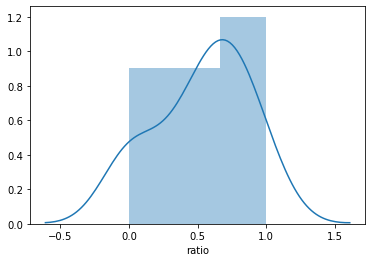

In [88]:
sns.distplot(samson_ratio["ratio"])

In [89]:
samson_final_ratio = sum(samson_ratio["ratio"]/len(samson_ratio["ratio"]))

print("Average for Samson :",round(samson_final_ratio*100))

Average for Samson : 53


## Ishan Kishan

In [90]:
boundary_runs22 # no of runs scored of boundaries by Ishan

,boundary runs
match_id,
7914,34
7940,4
11318,4


In [91]:
batsman_runs22  # total runs scored by Samson

,batsman_runs,ball
match_id,,
7914,58,42
7940,12,11
11318,5,3


In [92]:
kishan_ratio = pd.merge(batsman_runs22,boundary_runs22, on = "match_id", how = "outer")

In [93]:
kishan_ratio["ratio"] = (kishan_ratio["boundary runs"]/kishan_ratio["batsman_runs"])

kishan_ratio

,batsman_runs,ball,boundary runs,ratio
match_id,,,,
7914,58,42,34,0.586207
7940,12,11,4,0.333333
11318,5,3,4,0.800000


In [94]:
kishan_final_ratio = sum(kishan_ratio["ratio"]/len(kishan_ratio["ratio"]))

print("Average for Ishan Kishan :",round(kishan_final_ratio*100))

Average for Ishan Kishan : 57


## Smith

In [95]:
batsman_runs12 # total runs scored by Smith

,batsman_runs,ball
match_id,,
526,79,53
549,23,20
11318,12,15
11327,59,48


In [96]:
boundary_runs12 # no of runs scored of boundaries by Smith

,boundary runs
match_id,
526,38
549,8
11318,4
11327,26


In [97]:
smith_ratio = pd.merge(batsman_runs12,boundary_runs12, on = "match_id", how = "outer")

In [98]:
smith_ratio["ratio"] = (smith_ratio["boundary runs"]/smith_ratio["batsman_runs"])

smith_ratio

,batsman_runs,ball,boundary runs,ratio
match_id,,,,
526,79,53,38,0.481013
549,23,20,8,0.347826
11318,12,15,4,0.333333
11327,59,48,26,0.440678


In [99]:
smith_final_ratio = sum(smith_ratio["ratio"]/len(smith_ratio["ratio"]))

print("Average for Steven Smith :",round(smith_final_ratio*100))

Average for Steven Smith : 40


## Pollard

In [100]:
batsman_runs21 # total runs scored by Pollard

,batsman_runs,ball
match_id,,
219,25,13
267,4,15
299,20,18
319,64,33
403,1,7
447,17,14
456,11,6
501,14,12
513,7,3


In [101]:
boundary_runs21 # no of runs scored of boundaries by Pollard

,boundary runs
match_id,
219,18
299,8
319,48
447,10
456,6
501,6
513,6
526,58
549,14


In [102]:
pollard_ratio = pd.merge(batsman_runs21,boundary_runs21, on = "match_id", how = "outer")

In [103]:
pollard_ratio["boundary runs"].fillna(0, inplace = True)

pollard_ratio

,batsman_runs,ball,boundary runs
match_id,,,
219,25,13,18.0
267,4,15,0.0
299,20,18,8.0
319,64,33,48.0
403,1,7,0.0
447,17,14,10.0
456,11,6,6.0
501,14,12,6.0
513,7,3,6.0


In [104]:
pollard_ratio["ratio"] = (pollard_ratio["boundary runs"]/pollard_ratio["batsman_runs"])

pollard_ratio["ratio"].fillna(0, inplace = True)

pollard_ratio

,batsman_runs,ball,boundary runs,ratio
match_id,,,,
219,25,13,18.0,0.720000
267,4,15,0.0,0.000000
299,20,18,8.0,0.400000
319,64,33,48.0,0.750000
403,1,7,0.0,0.000000
447,17,14,10.0,0.588235
456,11,6,6.0,0.545455
501,14,12,6.0,0.428571
513,7,3,6.0,0.857143


In [105]:
pollard_final_ratio = sum(pollard_ratio["ratio"]/len(pollard_ratio["ratio"]))

print("Average for Pollard :",round(pollard_final_ratio*100))

Average for Pollard : 48


From all the above calculation and analysis of players we can predict Q de Kock and Sanju Samson to have best ratio

## Balls RR will take to reach team total of 100 as campared to MI

- FOR MUMBAI INDIANS

In [106]:
mumbai = MI_RR[MI_RR["batting_team"]=="Mumbai Indians"]

mumbai.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
20127,86,2008,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,2,Mumbai Indians,Rajasthan Royals,...,Sohail Tanvir,0,0,0,0,0,0,0,NaN,NaN
20128,86,2008,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,2,Mumbai Indians,Rajasthan Royals,...,Sohail Tanvir,0,0,0,0,0,0,0,NaN,NaN
20129,86,2008,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,2,Mumbai Indians,Rajasthan Royals,...,Sohail Tanvir,0,0,0,0,0,0,0,NaN,NaN
20130,86,2008,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,2,Mumbai Indians,Rajasthan Royals,...,Sohail Tanvir,1,0,0,0,0,1,1,NaN,NaN
20131,86,2008,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,2,Mumbai Indians,Rajasthan Royals,...,Sohail Tanvir,0,0,0,0,0,0,0,NaN,NaN


In [107]:
MI_runs = mumbai.groupby(["match_id","batting_team"]).agg({ "total_runs":"sum"})

print("Runs scored by Mumbai overall :")

MI_runs

Runs scored by Mumbai overall :


,,total_runs
match_id,batting_team,
86,Mumbai Indians,104
113,Mumbai Indians,145
160,Mumbai Indians,143
176,Mumbai Indians,212
219,Mumbai Indians,174
267,Mumbai Indians,94
299,Mumbai Indians,133
319,Mumbai Indians,197
377,Mumbai Indians,163


In [108]:
a =[]
for value in mumbai.groupby("match_id"):
    count = 0
    suma = 0
    d = list(value[1]["total_runs"])
    print(d)
    for i in d: 
        if suma <100:
            suma=suma+i
            count = count+1
            
    a.append(count)
a

[0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 5, 0, 6, 1, 0, 1, 0, 0, 6, 2, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 0, 0, 1, 4, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 4, 1, 1, 4, 0, 1, 0, 1, 2, 4, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 4, 6, 0, 1, 3, 1, 1, 0, 1, 4, 1, 1, 3, 0, 2, 0, 0, 1, 1]
[0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 4, 2, 0, 1, 0, 0, 0, 0, 3, 4, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 4, 1, 1, 4, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 4, 1, 1, 0, 2, 1, 2, 2, 4, 0, 0, 1, 1, 1, 0, 1, 4, 1, 1, 1, 0, 1, 0, 2, 4, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 4, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 4, 1, 0, 0, 0, 1, 0, 1, 0, 4, 2, 1, 6, 4, 4, 4]
[1, 2, 0, 0, 4, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 4, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 5, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 4, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 6, 0, 2, 0, 0, 1, 1, 1, 2, 4, 4, 4, 1, 2, 3, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0

[93,
 98,
 96,
 67,
 87,
 124,
 98,
 74,
 75,
 113,
 72,
 75,
 77,
 54,
 98,
 82,
 64,
 76,
 68,
 72]

In [109]:
MI_runs["balls for 100"] = a

print("Balls taken by MI for 100 team's run :")
MI_runs

Balls taken by MI for 100 team's run :


,,total_runs,balls for 100
match_id,batting_team,,
86,Mumbai Indians,104,93
113,Mumbai Indians,145,98
160,Mumbai Indians,143,96
176,Mumbai Indians,212,67
219,Mumbai Indians,174,87
267,Mumbai Indians,94,124
299,Mumbai Indians,133,98
319,Mumbai Indians,197,74
377,Mumbai Indians,163,75


In [110]:
MI_runs.describe().T

,count,mean,std,min,25%,50%,75%,max
total_runs,20.0,161.35,33.659714,92.0,144.5,170.0,180.25,212.0
balls for 100,20.0,83.15,17.412261,54.0,72.0,76.5,96.50,124.0


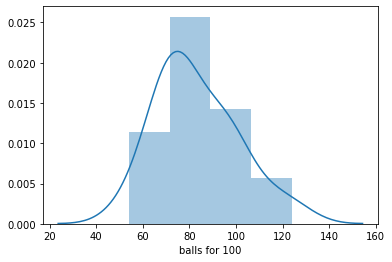

In [111]:
sns.distplot(MI_runs["balls for 100"])

Text(0.5, 1.0, "Ball's taken for 100 by MI")

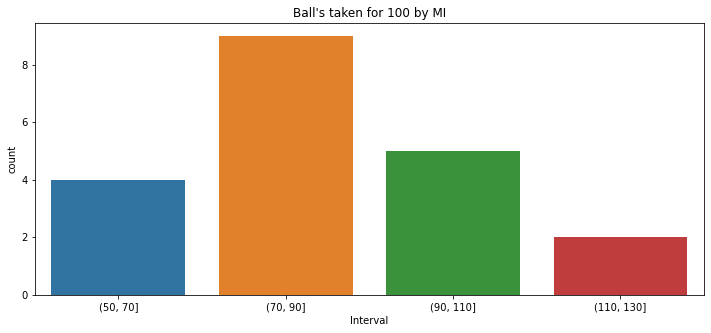

In [112]:
plt.figure(figsize=(12,5))
MI_runs["Interval"] = pd.cut(MI_runs["balls for 100"],[50,70,90,110,130])
sns.countplot(MI_runs["Interval"])
plt.title("Ball's taken for 100 by MI")

- FOR RAJASTHAN ROYALS

In [113]:
raj = MI_RR[MI_RR["batting_team"]=="Rajasthan Royals"]

raj.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
20024,86,2008,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Rajasthan Royals,Mumbai Indians,...,SM Pollock,0,0,0,0,0,0,0,NaN,NaN
20025,86,2008,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Rajasthan Royals,Mumbai Indians,...,SM Pollock,0,0,0,0,1,0,1,NaN,NaN
20026,86,2008,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Rajasthan Royals,Mumbai Indians,...,SM Pollock,0,0,0,0,1,0,1,NaN,NaN
20027,86,2008,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Rajasthan Royals,Mumbai Indians,...,SM Pollock,0,0,0,0,0,0,0,NaN,NaN
20028,86,2008,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Rajasthan Royals,Mumbai Indians,...,SM Pollock,0,0,0,0,1,0,1,NaN,NaN


In [114]:
RR_runs = raj.groupby(["match_id","batting_team"]).agg({ "total_runs":"sum"})

print("Runs scored by Rajasthan overall :")

RR_runs

Runs scored by Rajasthan overall :


,,total_runs
match_id,batting_team,
86,Rajasthan Royals,103
113,Rajasthan Royals,146
160,Rajasthan Royals,145
176,Rajasthan Royals,208
219,Rajasthan Royals,137
267,Rajasthan Royals,95
299,Rajasthan Royals,134
319,Rajasthan Royals,170
377,Rajasthan Royals,162


In [115]:
a =[]
for value in raj.groupby("match_id"):
    count = 0
    suma = 0
    d = list(value[1]["total_runs"])
    print(d)
    for i in d: 
        if suma <100:
            suma=suma+i
            count = count+1
            
    a.append(count)
a

[0, 1, 1, 0, 1, 2, 2, 0, 1, 4, 0, 0, 0, 0, 0, 1, 4, 4, 0, 0, 0, 0, 4, 1, 2, 1, 1, 1, 0, 0, 4, 6, 0, 1, 0, 6, 1, 1, 1, 0, 1, 1, 1, 0, 2, 4, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 4, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 4, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 4, 0, 4, 0, 0, 0, 1, 0, 1, 1, 4, 4, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 4, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 4, 1, 0, 4, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 4, 4, 1, 2, 1, 0, 0, 2, 1, 1, 1, 4, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 4, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 4, 4, 1, 1, 0, 6, 2, 2, 2, 1, 1, 3, 1, 3, 6, 1, 1, 1, 2]
[0, 2, 0, 4, 1, 0, 1, 0, 0, 0, 4, 2, 1, 4, 0, 1, 0, 0, 1, 0, 4, 0, 1, 1, 4, 0, 1, 0, 4, 3, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 4, 0, 4, 2, 1, 1, 1, 0, 4, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 4, 0, 4, 1, 1, 4, 1, 0, 0, 1, 1, 1, 0, 6, 1, 1, 6, 1, 6, 4, 4, 4, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0

[93,
 104,
 81,
 70,
 103,
 110,
 65,
 75,
 87,
 72,
 88,
 84,
 99,
 77,
 84,
 74,
 76,
 72,
 61,
 63]

In [116]:
RR_runs["balls for 100"] = a

print("Balls taken by RR for 100 team's run :")

RR_runs

Balls taken by RR for 100 team's run :


,,total_runs,balls for 100
match_id,batting_team,,
86,Rajasthan Royals,103,93
113,Rajasthan Royals,146,104
160,Rajasthan Royals,145,81
176,Rajasthan Royals,208,70
219,Rajasthan Royals,137,103
267,Rajasthan Royals,95,110
299,Rajasthan Royals,134,65
319,Rajasthan Royals,170,75
377,Rajasthan Royals,162,87


In [117]:
RR_runs.describe().T

,count,mean,std,min,25%,50%,75%,max
total_runs,20.0,159.85,28.058726,95.0,145.75,165.0,179.00,208.0
balls for 100,20.0,81.90,14.138041,61.0,72.00,79.0,89.25,110.0


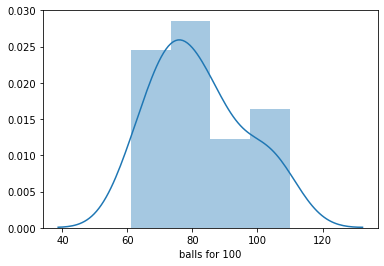

In [118]:
sns.distplot(RR_runs["balls for 100"])

Text(0.5, 1.0, "Ball's taken for 100 by RR")

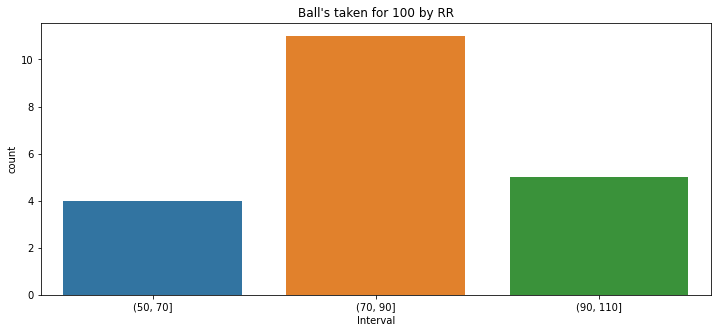

In [119]:
plt.figure(figsize=(12,5))
RR_runs["Interval"] = pd.cut(RR_runs["balls for 100"],[50,70,90,110])
sns.countplot(RR_runs["Interval"])
plt.title("Ball's taken for 100 by RR")

- Difference

In [120]:
RR_diff = RR_runs.copy()
MI_diff = MI_runs.copy()

RR_diff.reset_index(inplace = True)
MI_diff.reset_index(inplace = True)

RR_diff = RR_diff.drop(['batting_team','total_runs',"Interval"],axis = 1)
MI_diff = MI_diff.drop(['batting_team','total_runs',"Interval"],axis = 1)

RR_diff.columns = ["match_id","balls for 100 RR"]
MI_diff.columns = ["match_id","balls for 100 MI"]

In [121]:
RR_diff

,match_id,balls for 100 RR
0,86,93
1,113,104
2,160,81
3,176,70
4,219,103
5,267,110
6,299,65
7,319,75
8,377,87
9,403,72


In [122]:
MI_diff

,match_id,balls for 100 MI
0,86,93
1,113,98
2,160,96
3,176,67
4,219,87
5,267,124
6,299,98
7,319,74
8,377,75
9,403,113


In [123]:
final = pd.merge(RR_diff, MI_diff, on='match_id', how='inner')

final

,match_id,balls for 100 RR,balls for 100 MI
0,86,93,93
1,113,104,98
2,160,81,96
3,176,70,67
4,219,103,87
5,267,110,124
6,299,65,98
7,319,75,74
8,377,87,75
9,403,72,113


In [124]:
final["difference"] = abs(final["balls for 100 MI"] - final["balls for 100 RR"])

final

,match_id,balls for 100 RR,balls for 100 MI,difference
0,86,93,93,0
1,113,104,98,6
2,160,81,96,15
3,176,70,67,3
4,219,103,87,16
5,267,110,124,14
6,299,65,98,33
7,319,75,74,1
8,377,87,75,12
9,403,72,113,41


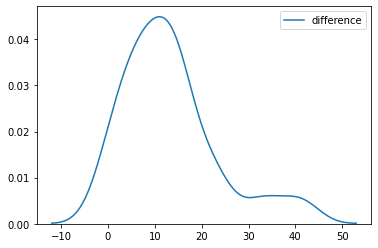

In [125]:
sns.kdeplot(final["difference"])

In [126]:
print("Average no of difference of balls in scoring 100 runs between RR and MI :{}".format(round(final["difference"].mean())))

Average no of difference of balls in scoring 100 runs between RR and MI :13


## Confidence Interval Calculation

In [127]:
final.describe().iloc[:,3:].T

,count,mean,std,min,25%,50%,75%,max
difference,20.0,13.25,10.32562,0.0,6.75,12.0,16.0,41.0


In [128]:
mean = final["difference"].mean()
sd = final["difference"].std()
n = len(final)

n

20

In [129]:
tstar = 2.064
se = sd/np.sqrt(n)
se

2.308878743596462

In [130]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("95% Confidence Interval for the balls less/more RR can take to reach a total of 100 as campared to MI  :{}".format((lcb, ucb)))

95% Confidence Interval for the balls less/more RR can take to reach a total of 100 as campared to MI  :(8.0, 18.0)


## BLS

### Archer

- No of Wicket by bowler

In [131]:
archer = MI_RR[(MI_RR["bowling_team"] == "Rajasthan Royals")&(MI_RR["bowler"]=="J Archer")]
archer.iloc[:,4:].head()

,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
155172,Mumbai Indians,bat,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,4,1,AS Yadav,Ishan Kishan,J Archer,0,0,1,0,1,1,2,NaN,NaN
155173,Mumbai Indians,bat,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,4,2,Ishan Kishan,AS Yadav,J Archer,0,0,0,0,0,0,0,NaN,NaN
155174,Mumbai Indians,bat,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,4,3,Ishan Kishan,AS Yadav,J Archer,0,0,0,0,1,0,1,NaN,NaN
155175,Mumbai Indians,bat,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,4,4,AS Yadav,Ishan Kishan,J Archer,0,0,0,0,0,0,0,NaN,NaN
155176,Mumbai Indians,bat,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,4,5,AS Yadav,Ishan Kishan,J Archer,0,0,0,0,4,0,4,NaN,NaN


In [132]:
archer = archer[archer["dismissal_kind"]!="run out"]
archer = archer[archer["wide_runs"]==0]

In [133]:
archer_wickets = pd.DataFrame(archer.groupby(["match_id"])["dismissal_kind"].count())

archer_wickets.columns = ["wickets"]

archer_wickets

,wickets
match_id,
7914,3
7940,2
11318,3
11327,1


- No of dot balls by bowler

In [134]:
archer_dot = archer[archer["total_runs"]==0]

In [135]:
archer_dot_ball = pd.DataFrame(archer_dot.groupby(["match_id"])["total_runs"].count())
archer_dot_ball.columns = ["dot balls"]

archer_dot_ball

,dot balls
match_id,
7914,12
7940,13
11318,6
11327,14


- No of boundary runs given

In [136]:
archer_bound = archer[(archer["batsman_runs"]==4)|(archer["batsman_runs"]==6)]

In [137]:
archer_bound_run = pd.DataFrame(archer_bound.groupby(["match_id"])["batsman_runs"].sum())

archer_bound_run.columns = ["boundary runs"]

archer_bound_run

,boundary runs
match_id,
7914,12
11318,24
11327,14


- No of boundaries hit off the bowler

In [138]:
archer_bound_count = pd.DataFrame(archer_bound.groupby(["match_id"])["batsman_runs"].count())

archer_bound_count.columns = ["boundary count"]

archer_bound_count

,boundary count
match_id,
7914,3
11318,5
11327,3


- Total Balls Bowled by the bowler

In [139]:
archer_total_balls = pd.DataFrame(archer.groupby(["match_id"])["ball"].count())

archer_total_balls

,ball
match_id,
7914,24
7940,24
11318,24
11327,24


In [140]:
fin11 = pd.merge(archer_total_balls,archer_wickets, on='match_id', how='outer')
fin11 = pd.merge(fin11, archer_dot_ball, on='match_id', how='outer')
fin11 = pd.merge(fin11, archer_bound_run, on='match_id', how='outer')
fin11 = pd.merge(fin11, archer_bound_count, on='match_id', how='outer')
fin11

,ball,wickets,dot balls,boundary runs,boundary count
match_id,,,,,
7914,24,3,12,12.0,3.0
7940,24,2,13,NaN,NaN
11318,24,3,6,24.0,5.0
11327,24,1,14,14.0,3.0


- Dealing with null values

In [141]:
fin11.fillna(0 , inplace = True)

fin11

,ball,wickets,dot balls,boundary runs,boundary count
match_id,,,,,
7914,24,3,12,12.0,3.0
7940,24,2,13,0.0,0.0
11318,24,3,6,24.0,5.0
11327,24,1,14,14.0,3.0


In [142]:
BLS_archer = ( (fin11["wickets"] + (fin11["dot balls"]*2)) - (fin11["boundary runs"]/fin11["boundary count"]) ) / (fin11["ball"] - (fin11["dot balls"] * 2.5))

In [143]:
BLS_archer = BLS_archer.dropna()

In [144]:
BLS_archer = sum(BLS_archer)/len(BLS_archer)

In [145]:
print("BLS for Archer :",round(BLS_archer,2))

BLS for Archer : -1.64


### Trent Boult

- No of wickets by bowler

In [146]:
boult_all = matches[(matches["batting_team"] == "Rajasthan Royals")&(matches["bowler"]=="TA Boult")]

In [147]:
cond1 = boult_all["season"]==2018
cond2 = boult_all["season"]==2019
boult = boult_all[cond1|cond2]

boult.iloc[:,4:].head()

,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
151659,Delhi Daredevils,field,Rajasthan Royals,1,Rajasthan Royals,Delhi Daredevils,1,1,AM Rahane,D Short,TA Boult,0,0,0,0,0,0,0,NaN,NaN
151660,Delhi Daredevils,field,Rajasthan Royals,1,Rajasthan Royals,Delhi Daredevils,1,2,AM Rahane,D Short,TA Boult,0,0,0,0,2,0,2,NaN,NaN
151661,Delhi Daredevils,field,Rajasthan Royals,1,Rajasthan Royals,Delhi Daredevils,1,3,AM Rahane,D Short,TA Boult,0,0,0,0,0,0,0,NaN,NaN
151662,Delhi Daredevils,field,Rajasthan Royals,1,Rajasthan Royals,Delhi Daredevils,1,4,AM Rahane,D Short,TA Boult,0,0,0,0,0,0,0,NaN,NaN
151663,Delhi Daredevils,field,Rajasthan Royals,1,Rajasthan Royals,Delhi Daredevils,1,5,AM Rahane,D Short,TA Boult,0,0,0,0,3,0,3,NaN,NaN


In [148]:
boult = boult[boult["dismissal_kind"]!="run out"]
boult = boult[boult["wide_runs"]==0]

boult.match_id.unique()

array([ 7899,  7925, 11344], dtype=int64)

In [149]:
boult_wickets = pd.DataFrame(boult.groupby(["match_id"])["dismissal_kind"].count())

boult_wickets.columns = ["wickets"]

boult_wickets

,wickets
match_id,
7899,1
7925,2
11344,2


- No of dot balls by bowler

In [150]:
boult_dot = boult[boult["total_runs"]==0]

In [151]:
boult_dot_ball = pd.DataFrame(boult_dot.groupby(["match_id"])["total_runs"].count())
boult_dot_ball.columns = ["dot balls"]

boult_dot_ball

,dot balls
match_id,
7899,9
7925,4
11344,10


- No of boundary runs given

In [152]:
boult_bound = boult[(boult["batsman_runs"]==4)|(boult["batsman_runs"]==6)]

In [153]:
boult_bound_run = pd.DataFrame(boult_bound.groupby(["match_id"])["batsman_runs"].sum())

boult_bound_run.columns = ["boundary runs"]

boult_bound_run

,boundary runs
match_id,
7899,18
7925,12
11344,12


- No of boundaries hit off the bowler

In [154]:
boult_bound_count = pd.DataFrame(boult_bound.groupby(["match_id"])["batsman_runs"].count())

boult_bound_count.columns = ["boundary count"]

boult_bound_count

,boundary count
match_id,
7899,4
7925,3
11344,2


In [155]:
boult_total_balls = pd.DataFrame(boult.groupby(["match_id"])["ball"].count())

boult_total_balls

,ball
match_id,
7899,18
7925,17
11344,24


In [156]:
fin12 = pd.merge(boult_total_balls,boult_wickets, on='match_id', how='outer')
fin12 = pd.merge(fin12, boult_dot_ball, on='match_id', how='outer')
fin12 = pd.merge(fin12, boult_bound_run, on='match_id', how='outer')
fin12 = pd.merge(fin12, boult_bound_count, on='match_id', how='outer')
fin12

,ball,wickets,dot balls,boundary runs,boundary count
match_id,,,,,
7899,18,1,9,18,4
7925,17,2,4,12,3
11344,24,2,10,12,2


In [158]:
BLS_boult = ( (fin12["wickets"] + (fin12["dot balls"]*2)) - (fin12["boundary runs"]/fin12["boundary count"]) ) / (fin12["ball"] - (fin12["dot balls"] * 2.5))

In [159]:
BLS_boult = sum(BLS_boult)/len(BLS_boult)

In [160]:
print("BLS for Boult :",round(BLS_boult,2))

BLS for Boult : -6.12
